Logistic Regression is a classification algorithm

For nerds, it is a binary response model.

For example, lets say your Manager is thinking about giving you a promotion based on all the hard work you have done. There are only two outcomes, Yes, or No. It is unlike predicting your salary as that have a continous range and provide numerical results. The outcomes for a Logistic Regression are called Binary Outcomes

Logistic Regression is really important for businesses, lets say Taste of India is selling their Crab Curry. Logistic Regression will be extremely useful to forecast the two binary outcomes, yes people will buy it, no people won't based on independant variables such as Spice Level. I know you guys would not eat the crab curry if it isn't spicy at all, most of their customers are indian, its in east ham, noone is buying bland crab curry. Of course there needs to be some spice but not too much. They can know decide the spice level to put in their crab curry which will make more people buy it.

The indepandant variable in this case, the spice level can be any level, it is continuous but dependant variable can only be a binary outcome. 




**Abstract**

We will predict the probability 


In [46]:
!pip install ydata-profiling

In [47]:
import pandas as pd
import numpy as np
import random as rnd
import pandas_profiling as pp


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report



In [48]:
df = pd.read_csv("D:\Downloads\healthdata.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [49]:
pp.ProfileReport(df)

In [50]:
df.dropna(axis=0, inplace=True)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot:>

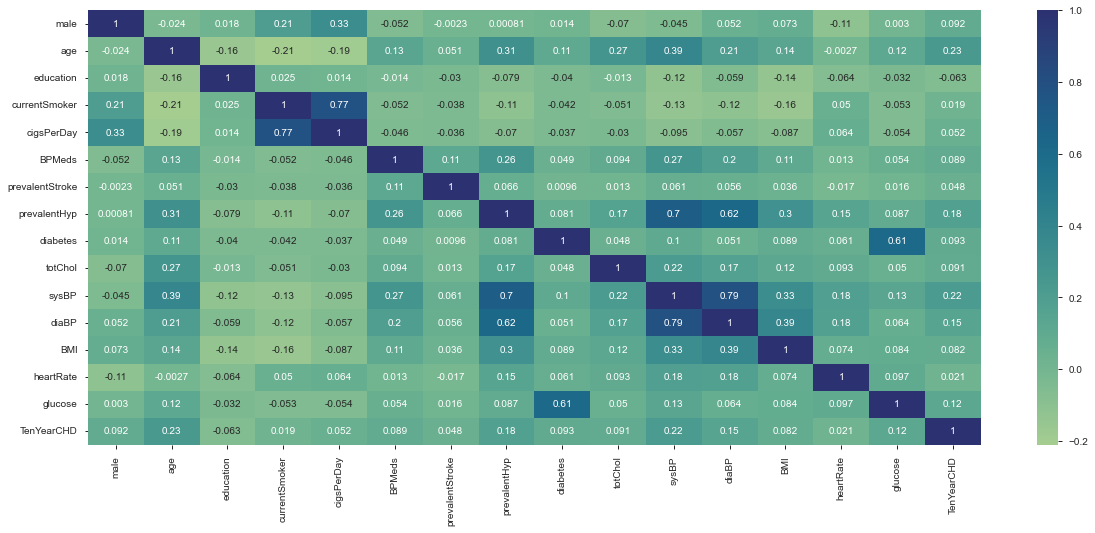

In [51]:
plt.figure(figsize= (20, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'crest')

In [52]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [53]:
df_1=df[df['TenYearCHD']==1]
df_2=df[df['TenYearCHD']==0]
print(df_1['glucose'].mean()-df_2['glucose'].mean())


8.11229544713271


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[912  11]
 [157  17]]
0.8531337698783911


There are 157 False Negatives which is worse than 11 False Positives.

However percentage wise there is 85% chance that this model is accurate which is good.

In [57]:
recall = recall * 100 
recall

85.3133769878391